## M. Mize K-State Honor Code"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."##

In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics 
from sklearn import neighbors
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.cluster import KMeans

In [272]:
df = pd.read_csv("data/movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [282]:
df.fillna(value=0,axis=1,inplace=True)
df.shape

(5043, 28)

In [274]:
df.isnull().any()

color                        False
director_name                False
num_critic_for_reviews       False
duration                     False
director_facebook_likes      False
actor_3_facebook_likes       False
actor_2_name                 False
actor_1_facebook_likes       False
gross                        False
genres                       False
actor_1_name                 False
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                 False
facenumber_in_poster         False
plot_keywords                False
movie_imdb_link              False
num_user_for_reviews         False
language                     False
country                      False
content_rating               False
budget                       False
title_year                   False
actor_2_facebook_likes       False
imdb_score                   False
aspect_ratio                 False
movie_facebook_likes         False
dtype: bool

In [275]:
df.fillna(value=0,axis=1,inplace=True)
df.shape

(5043, 28)

# Regression

## Linear Regression 

In [277]:
features = ['actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio',
       'movie_facebook_likes']
target = ['imdb_score']

In [278]:
train, test = train_test_split(df,test_size=0.30)
train.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4467,Color,0,8.0,60.0,0.0,109.0,Tucker Smallwood,210.0,0.0,Drama|Sci-Fi,...,79.0,English,USA,0,5000000.0,0.0,121.0,7.7,1.33,963
466,Color,Joe Pytka,46.0,88.0,30.0,366.0,Wayne Knight,13000.0,90443603.0,Adventure|Animation|Comedy|Family|Fantasy|Sci-...,...,123.0,English,USA,PG,80000000.0,1996.0,967.0,6.3,1.77,0
945,Color,Rob Marshall,321.0,125.0,252.0,10000.0,Meryl Streep,40000.0,127997349.0,Adventure|Comedy|Drama|Fantasy|Musical,...,779.0,English,USA,PG,50000000.0,2014.0,11000.0,6.0,2.39,90000
1044,Color,Chuck Bowman,32.0,89.0,42.0,235.0,Lochlyn Munro,598.0,0.0,Horror|Thriller,...,32.0,English,USA,0,1500000.0,2006.0,555.0,4.6,1.78,352
302,Color,Spike Jonze,333.0,101.0,0.0,279.0,Ryan Corr,925.0,77222184.0,Adventure|Drama|Family|Fantasy,...,388.0,English,Germany,PG,100000000.0,2009.0,468.0,6.8,2.35,11000


In [190]:
X_train = train[features].dropna()
y_train = train[target].dropna()
X_test = test[features].dropna()
y_test = test[target].dropna()

In [191]:
lin = linear_model.LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [192]:
lin_score_train = lin.score(X_test, y_test)
lin_score_test = lin.score(X_train, y_train)

In [193]:
print("Training score: ",lin_score_train)
print("Testing score: ",lin_score_test)

('Training score: ', 0.2015298366756344)
('Testing score: ', 0.23683707254318034)


In [194]:
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [195]:
knn_score_train = knn.score(X_test, y_test)
knn_score_test = knn.score(X_train, y_train)

print("Training score: ",knn_score_train)
print("Testing score: ",knn_score_test)

('Training score: ', -0.04237363917777337)
('Testing score: ', 0.3168817433111979)


## Lasso Regression 

In [196]:
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)  

for train_index, test_index in kf.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=2, random_state=None, shuffle=False)
('TRAIN:', array([2, 3]), 'TEST:', array([0, 1]))
('TRAIN:', array([0, 1]), 'TEST:', array([2, 3]))


In [197]:
df['language_1'] = df.language.astype('category').cat.codes;
df['country_1'] = df.country.astype('category').cat.codes;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 30 columns):
color                        5043 non-null object
director_name                5043 non-null object
num_critic_for_reviews       5043 non-null float64
duration                     5043 non-null float64
director_facebook_likes      5043 non-null float64
actor_3_facebook_likes       5043 non-null float64
actor_2_name                 5043 non-null object
actor_1_facebook_likes       5043 non-null float64
gross                        5043 non-null float64
genres                       5043 non-null object
actor_1_name                 5043 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5043 non-null object
facenumber_in_poster         5043 non-null float64
plot_keywords                5043 non-null object
movie_imdb_link              5043 non-

In [198]:
predictors = ['actor_2_facebook_likes', 'aspect_ratio', 'cast_total_facebook_likes', 'movie_facebook_likes',
'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes',
'gross', 'num_voted_users', 'facenumber_in_poster', 'num_user_for_reviews', 'budget',
'title_year', 'language_1', 'country_1'];
target = ['imdb_score'];


In [199]:
data_clean = df[predictors + target].dropna()
data_clean.head()

,actor_2_facebook_likes,aspect_ratio,cast_total_facebook_likes,movie_facebook_likes,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,language_1,country_1,imdb_score
0,936.0,1.78,4834,33000,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,0.0,3054.0,237000000.0,2009.0,12,63,7.9
1,5000.0,2.35,48350,0,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,0.0,1238.0,300000000.0,2007.0,12,63,7.1
2,393.0,2.35,11700,85000,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,1.0,994.0,245000000.0,2015.0,12,62,6.8
3,23000.0,2.35,106759,164000,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,0.0,2701.0,250000000.0,2012.0,12,63,8.5
4,12.0,0.00,143,0,0.0,0.0,131.0,0.0,131.0,0.0,8,0.0,0.0,0.0,0.0,0,0,7.1


In [200]:
pred_train, pred_test, tar_train, tar_test = train_test_split(data_clean[predictors], data_clean.imdb_score,
test_size=.3, random_state=123)

In [201]:
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

In [202]:
dict(zip(predictors, model.coef_))

{'actor_1_facebook_likes': 6.394985039231092e-05,
 'actor_2_facebook_likes': 6.398217950949583e-05,
 'actor_3_facebook_likes': 5.621652114040181e-05,
 'aspect_ratio': -0.011517456947642437,
 'budget': -1.006148320488528e-09,
 'cast_total_facebook_likes': -6.309132765776072e-05,
 'country_1': -0.0031345005002076866,
 'director_facebook_likes': 8.434482166566115e-06,
 'duration': 0.008950384641955137,
 'facenumber_in_poster': -0.02296445831952879,
 'gross': -1.5176988759226746e-09,
 'language_1': 0.021151050363694697,
 'movie_facebook_likes': -3.634609909159999e-06,
 'num_critic_for_reviews': 0.0019104763744881407,
 'num_user_for_reviews': -0.0004899285166666378,
 'num_voted_users': 3.9010895004315585e-06,
 'title_year': -0.0009166882634527017}

/Users/marymize/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/Users/marymize/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


Text(0.5,1,'Regression Coefficients Progression for Lasso Paths')

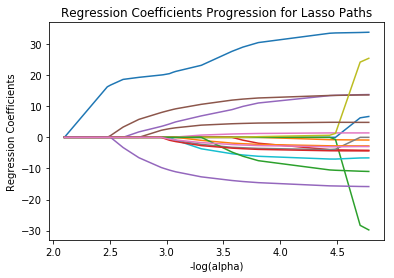

In [203]:
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

/Users/marymize/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/Users/marymize/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cv_mse_path_ is deprecated; Attribute ``cv_mse_path_`` is deprecated in 0.18 and will be removed in 0.20. Use ``mse_path_`` instead
  warnings.warn(msg, category=DeprecationWarning)
/Users/marymize/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function cv_mse_path_ is deprecated; Attribute ``cv_mse_path_`` is deprecated in 0.18 and will be removed in 0.20. Use ``mse_path_`` instead
  warnings.warn(msg, category=DeprecationWarning)
/Users/marymize/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


Text(0.5,1,'Mean squared error on each fold')

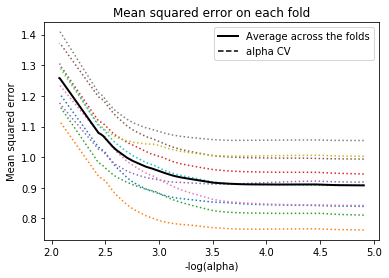

In [204]:
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [205]:
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
0.8923707039211081
test data MSE
1.0179292095943075


In [206]:
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)


training data R-square
0.2903207204336309
test data R-square
0.2049216974401793


# Classification

In [207]:
bins = [0, 4, 6, 8, 10]

In [208]:
group_names = ['bad', 'ok', 'good', 'excellent']

In [209]:
df['score'] = pd.cut(df['imdb_score'], bins, labels=group_names)

In [210]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,language_1,country_1,score
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,12,63,good
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,12,63,good
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,12,62,good
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,12,63,excellent
4,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,0.0,Documentary,...,0,0.0,0.0,12.0,7.1,0.00,0,0,0,good


In [211]:
cat_var = ['gross','budget','score']
num_var = ['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','num_user_for_reviews','cast_total_facebook_likes', 'num_voted_users']
categorical_df = pd.get_dummies(df[cat_var], drop_first=True)
numerical_df = df[num_var]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()

,gross,budget,score_ok,score_good,score_excellent,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,num_user_for_reviews,cast_total_facebook_likes,num_voted_users
0,760505847.0,237000000.0,0,1,0,1000.0,936.0,855.0,3054.0,4834,886204
1,309404152.0,300000000.0,0,1,0,40000.0,5000.0,1000.0,1238.0,48350,471220
2,200074175.0,245000000.0,0,1,0,11000.0,393.0,161.0,994.0,11700,275868
3,448130642.0,250000000.0,0,0,1,27000.0,23000.0,23000.0,2701.0,106759,1144337
4,0.0,0.0,0,1,0,131.0,12.0,0.0,0.0,143,8


In [212]:
new_df['imdb_score'] = df['imdb_score'].astype(int)
print new_df.dtypes

gross                        float64
budget                       float64
score_ok                       uint8
score_good                     uint8
score_excellent                uint8
actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
num_user_for_reviews         float64
cast_total_facebook_likes      int64
num_voted_users                int64
imdb_score                     int64
dtype: object


## Decision tree

In [213]:
y = new_df['imdb_score']
X = new_df.drop(['imdb_score'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()    
classifier.fit(X_train, y_train) 

classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [214]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[  0   0   0   0   0   0   0   0   0]
 [  2   4   6   1   0   0   0   0   0]
 [  0   9  23   5   0   0   0   0   0]
 [  0   0   1  35  48   8   0   0   0]
 [  0   0   0  54 225  16   0   0   0]
 [  0   0   0  10  32 320 166   5   0]
 [  0   0   0   0   0 181 245  10   0]
 [  0   0   0   0   0   2  16  82   4]
 [  0   0   0   0   0   0   0   2   1]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         0
          2       0.31      0.31      0.31        13
          3       0.77      0.62      0.69        37
          4       0.33      0.38      0.36        92
          5       0.74      0.76      0.75       295
          6       0.61      0.60      0.60       533
          7       0.57      0.56      0.57       436
          8       0.83      0.79      0.81       104
          9       0.20      0.33      0.25         3

avg / total       0.62      0.62      0.62      1513



/Users/marymize/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [215]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.6120290812954395
--------------------------------------------------------
[[  0   0   0   0   0   0   0   0   0]
 [  1   5   6   1   0   0   0   0   0]
 [  0   8  22   7   0   0   0   0   0]
 [  0   0   1  28  55   8   0   0   0]
 [  0   0   0  56 221  18   0   0   0]
 [  0   0   0   9  33 324 160   7   0]
 [  0   0   0   0   0 183 243  10   0]
 [  0   0   0   0   0   2  14  82   6]
 [  0   0   0   0   0   0   0   2   1]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         0
          2       0.38      0.38      0.38        13
          3       0.76      0.59      0.67        37
          4       0.28      0.30      0.29        92
          5       0.72      0.75      0.73       295
          6       0.61      0.61      0.61       533
          7       0.58      0.56      0.57       436
          8       0.81      0.79      0.80       104
          9       0.14      0.33     

/Users/marymize/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ValueError: multiclass format is not supported

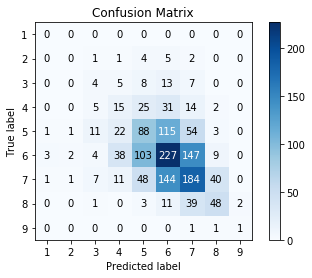

In [280]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

## Knn 

In [217]:
y = new_df['imdb_score']
X = new_df.drop(['imdb_score'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [218]:
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.32650363516192993
[[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   3   5   5   0   0   0]
 [  1   0   1   2   9  18   6   0   0]
 [  0   0   4   8  22  46  12   0   0]
 [  0   3   8  14  95 128  46   1   0]
 [  0   4   7  29 121 254 109   9   0]
 [  0   3  10  21  71 187 130  14   0]
 [  0   2   1   1  12  45  37   6   0]
 [  0   0   0   0   0   2   0   1   0]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00        13
          3       0.03      0.03      0.03        37
          4       0.10      0.09      0.09        92
          5       0.28      0.32      0.30       295
          6       0.37      0.48      0.42       533
          7       0.38      0.30      0.34       436
          8       0.19      0.06      0.09       104
          9       0.00      0.00      0.00         3

avg / total       0.32      0.33      0.31      1513



/Users/marymize/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/marymize/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ValueError: multiclass format is not supported

In [219]:
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.33070866 0.29980276 0.26086957 0.19762846 0.19960474 0.1984127
 0.19521912 0.20717131 0.23705179 0.282     ]
0.24084691190453605


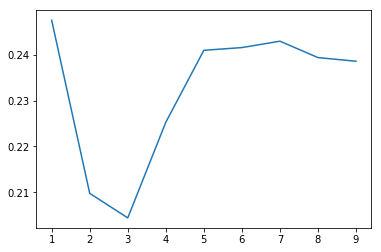

In [220]:
from sklearn.grid_search import GridSearchCV

knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()

In [221]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.24747174301
{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


## Random Forest Classifier

In [222]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print X_new

[[7.60505847e+08 2.37000000e+08 8.86204000e+05]
 [3.09404152e+08 3.00000000e+08 4.71220000e+05]
 [2.00074175e+08 2.45000000e+08 2.75868000e+05]
 ...
 [0.00000000e+00 1.40000000e+03 3.80000000e+01]
 [1.04430000e+04 0.00000000e+00 1.25500000e+03]
 [8.52220000e+04 1.10000000e+03 4.28500000e+03]]


In [223]:
selector = SelectKBest(chi2, k=3).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print idxs_selected

[ 0  1 10]


In [224]:
X.head(1)

,gross,budget,score_ok,score_good,score_excellent,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,num_user_for_reviews,cast_total_facebook_likes,num_voted_users
0,760505847.0,237000000.0,0,1,0,1000.0,936.0,855.0,3054.0,4834,886204


In [225]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.3747521480502313
--------------------------------------------------------
[[  0   0   0   0   0   0   0   0   0]
 [  0   0   1   1   4   5   2   0   0]
 [  0   0   4   5   8  13   7   0   0]
 [  0   0   5  15  25  31  14   2   0]
 [  1   1  11  22  88 115  54   3   0]
 [  3   2   4  38 103 227 147   9   0]
 [  1   1   7  11  48 144 184  40   0]
 [  0   0   1   0   3  11  39  48   2]
 [  0   0   0   0   0   0   1   1   1]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00        13
          3       0.12      0.11      0.11        37
          4       0.16      0.16      0.16        92
          5       0.32      0.30      0.31       295
          6       0.42      0.43      0.42       533
          7       0.41      0.42      0.42       436
          8       0.47      0.46      0.46       104
          9       0.33      0.33     

/Users/marymize/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ValueError: multiclass format is not supported

# Clustering  

In [235]:
df = pd.read_csv("data/movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [236]:
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [237]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [238]:

df = df.dropna()
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [242]:
X.var()

gross                        4.203939e+15
budget                       3.847697e+16
score_ok                     2.015492e-01
score_good                   2.316764e-01
score_excellent              4.766112e-02
actor_1_facebook_likes       2.253696e+08
actor_2_facebook_likes       1.630619e+07
actor_3_facebook_likes       2.761606e+06
num_user_for_reviews         1.425846e+05
cast_total_facebook_likes    3.299236e+08
num_voted_users              1.917817e+10
dtype: float64

In [243]:
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [244]:
k_means.cluster_centers_

array([[2.25156345e+07, 2.07818428e+07, 2.94917521e-01, 6.23049487e-01,
        4.39144004e-02, 5.88122247e+03, 1.34762773e+03, 5.06539679e+02,
        2.15269059e+02, 8.47802965e+03, 5.96300334e+04],
       [2.20141200e+06, 1.22155000e+10, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 6.29000000e+02, 3.98000000e+02, 7.40000000e+01,
        2.79000000e+02, 1.17300000e+03, 6.88830000e+04],
       [7.79033500e+05, 2.80687997e+09, 0.00000000e+00, 7.50000000e-01,
        2.50000000e-01, 5.26750000e+02, 3.28750000e+02, 2.21000000e+02,
        2.06250000e+02, 1.15475000e+03, 7.35975000e+04],
       [1.82191401e+08, 1.16383712e+08, 1.59420290e-01, 7.35507246e-01,
        9.96376812e-02, 1.20480018e+04, 4.09629348e+03, 1.74756159e+03,
        7.30170290e+02, 1.96995399e+04, 2.79121254e+05]])

In [245]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,3
1,3
2,3
3,3
4,0


In [246]:
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df2 = df.join(df1)
df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,3
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,3
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,3
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,3
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,0


In [247]:
df2.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster
3751,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171,0
3752,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697,0
3753,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,0
3754,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,0
3755,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456,0


In [248]:
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
cluster,,,,,,,,,,,,,,,,
0,153.355230,108.852428,726.796077,657.428705,7160.467933,4.196949e+07,91520.830946,10485.295143,1.381071,297.283935,3.724488e+07,2002.506538,1782.464197,6.454919,2.098767,7645.244707
1,62.000000,89.000000,7.000000,36.000000,186.000000,3.233386e+07,29843.000000,407.000000,1.000000,81.000000,7.500000e+06,1995.000000,147.000000,6.700000,2.350000,0.000000
2,257.666667,97.333333,3888.000000,529.333333,14533.000000,6.073547e+07,221480.666667,17033.333333,0.000000,516.000000,1.300000e+07,2004.666667,1320.333333,7.233333,2.016667,8000.000000
3,250.483333,118.729630,1270.770370,1451.187037,11242.259259,1.159134e+08,190418.544444,17713.925926,1.362963,571.625926,9.997881e+07,2005.777778,3452.605556,6.522222,2.183944,19541.587037


In [249]:
df2.groupby(['cluster']).size()

cluster
0    3212
1       1
2       3
3     540
dtype: int64

/Users/marymize/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


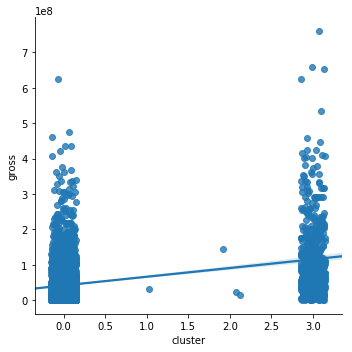

In [251]:
sns.lmplot("cluster", "gross", df2, x_jitter=.15, y_jitter=.15)

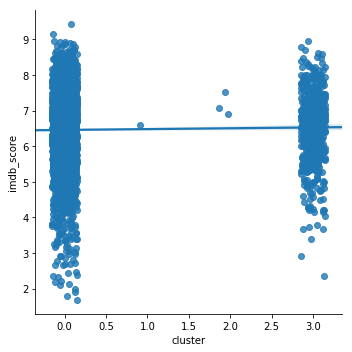

In [253]:
sns.lmplot("cluster", "imdb_score", df2, x_jitter=.15, y_jitter=.15)

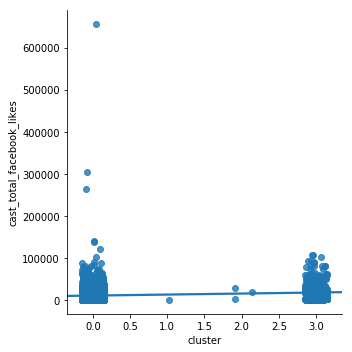

In [254]:
sns.lmplot("cluster", "cast_total_facebook_likes", df2, x_jitter=.15, y_jitter=.15)

# Hierarchical

In [257]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

np.random.seed(1) 
agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([0, 0, 0, ..., 1, 1, 1])

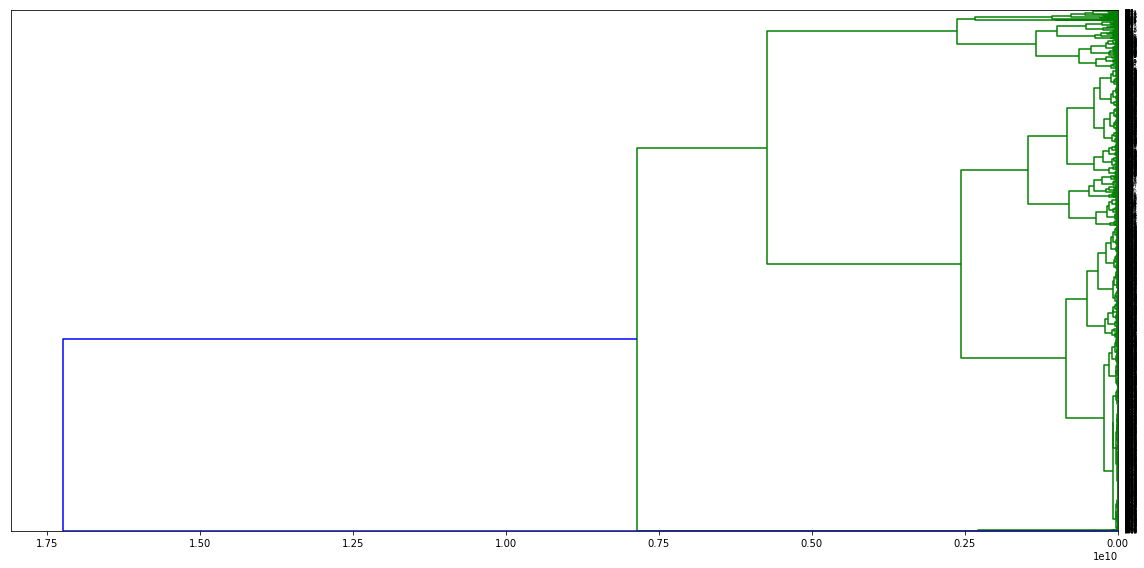

In [258]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() 

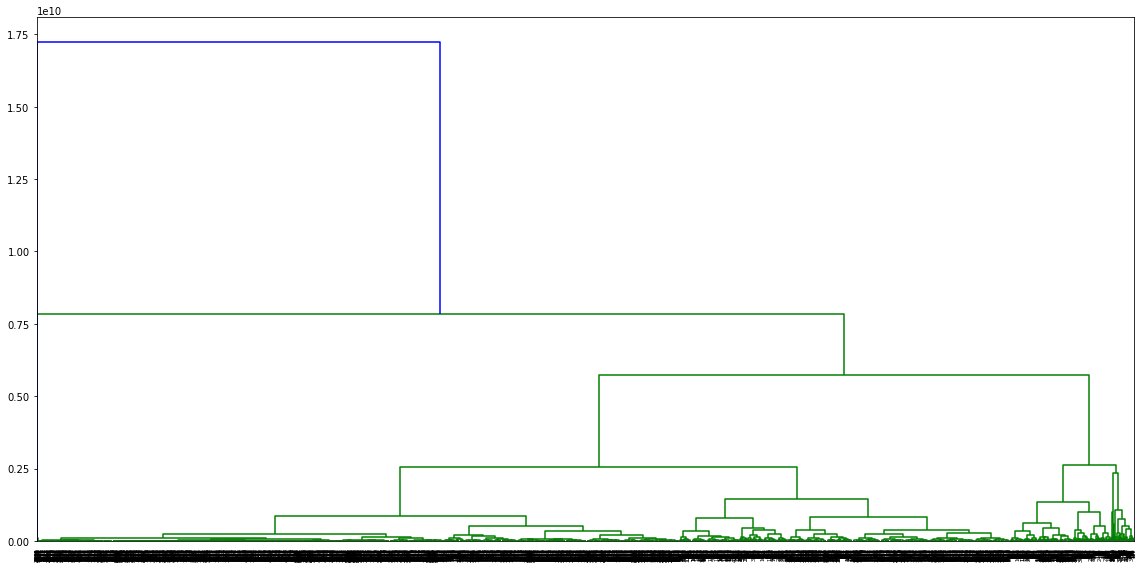

In [260]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top")
plt.tight_layout()

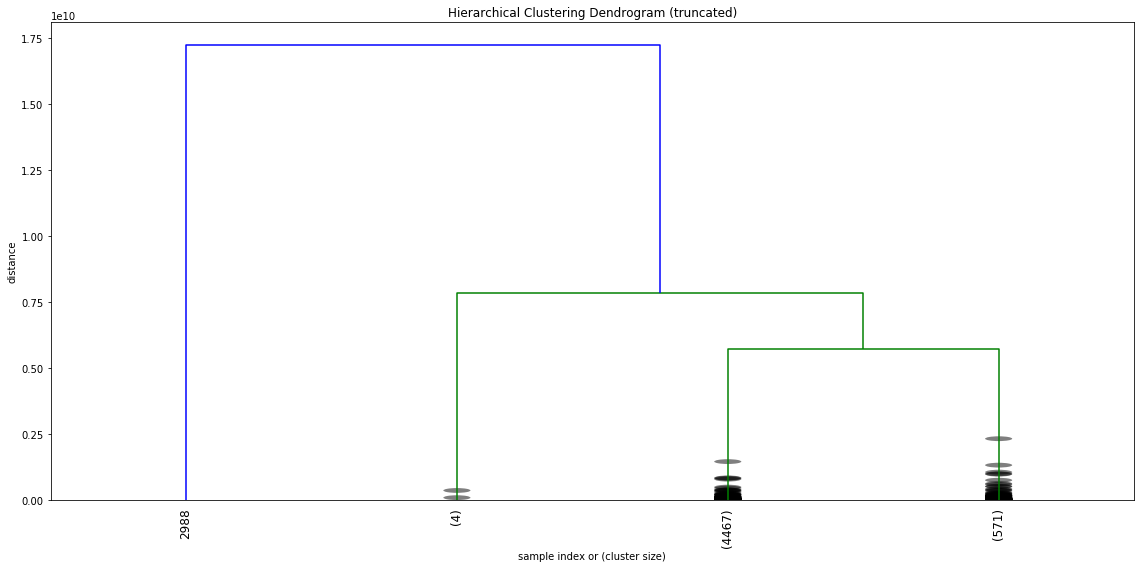

In [261]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  
           p=4,  
           
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  
           orientation="top")
plt.tight_layout() 

In [262]:
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,1


In [263]:
df2 = df.join(df1)
df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


In [264]:
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
cluster,,,,,,,,,,,,,,,,
0,236.716338,118.301616,1220.798923,1329.750449,10690.913824,1.051398e+08,176622.570916,16965.147217,1.303411,529.432675,8.914122e+07,2005.096948,3427.429084,6.515081,2.167792,17736.197487
1,155.238498,108.874491,732.613459,674.375900,7234.868232,4.345426e+07,93399.734272,10577.371205,1.391549,303.179969,3.880045e+07,2002.607825,1777.966823,6.455806,2.101130,7896.688889
2,257.666667,97.333333,3888.000000,529.333333,14533.000000,6.073547e+07,221480.666667,17033.333333,0.000000,516.000000,1.300000e+07,2004.666667,1320.333333,7.233333,2.016667,8000.000000
3,62.000000,89.000000,7.000000,36.000000,186.000000,3.233386e+07,29843.000000,407.000000,1.000000,81.000000,7.500000e+06,1995.000000,147.000000,6.700000,2.350000,0.000000


In [265]:
df2.groupby('cluster').size()

cluster
0     557
1    3195
2       3
3       1
dtype: int64

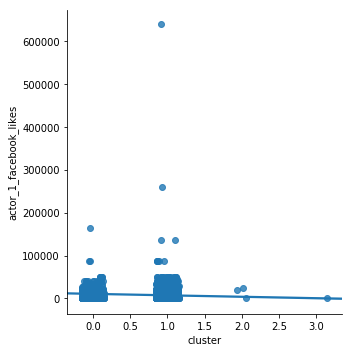

In [266]:
sns.lmplot("cluster", "actor_1_facebook_likes", df2, x_jitter=.15, y_jitter=.15)

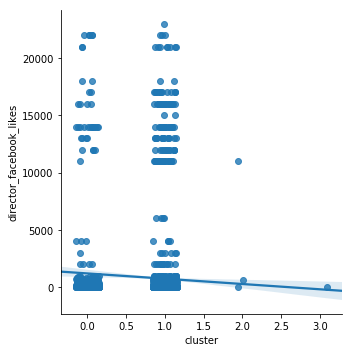

In [268]:
sns.lmplot("cluster", "director_facebook_likes", df2, x_jitter=.15, y_jitter=.15)

# Storytelling

# Interpretation of Regression

# Interpretation of Classification 

# Interpretation of Clustering  

- 

## References

- https://codeliteral.wordpress.com/2017/02/01/machine-learning-data-analysis-lasso-regression-with-sklearn/
